# Managing Analytic Projects

## Data Cleaning and Visualizations

Hiba Hassan, Mahrukh Khan, Kele Isibor, Lily Alvey, Amelia Janaskie

In [68]:
import pandas as pd
import geopandas as gpd
import shapely
import rtree
import matplotlib.pyplot as plt
import seaborn
seaborn.set_style("white")
%matplotlib inline

In [69]:
snap_eligible = pd.read_csv('SNAP_Eligible.csv')
snap_eligible.head()

,Geography,Geographic Area Name,SNAP
0,42003010301,"Census Tract 103.01, Allegheny County, Pennsyl...",0
1,42003010302,"Census Tract 103.02, Allegheny County, Pennsyl...",91
2,42003020100,"Census Tract 201, Allegheny County, Pennsylvania",92
3,42003020300,"Census Tract 203, Allegheny County, Pennsylvania",0
4,42003030500,"Census Tract 305, Allegheny County, Pennsylvania",424


In [70]:
snap_stores = pd.read_csv('SNAP_Store_Locations.csv')
snap_stores.head()

,X,Y,Store_Name,Address,Address_Line__2,City,State,Zip5,County,Longitude,Latitude,ObjectId
0,-79.812576,40.502525,K & G Supermart,1043 Hamil Rd,NaN,Verona,PA,15147,ALLEGHENY,-79.812576,40.502525,350
1,-79.789886,40.499241,Family Dollar 8406,1122 Milltown Rd,NaN,Verona,PA,15147,ALLEGHENY,-79.789886,40.499241,351
2,-79.789368,40.498741,Dollar General 22867,1108 Milltown Rd,NaN,Verona,PA,15147,ALLEGHENY,-79.789368,40.498741,352
3,-79.818901,40.484097,7-Eleven Store 36205,6106 Saltsburg Rd,NaN,Verona,PA,15147,ALLEGHENY,-79.818901,40.484097,353
4,-79.814064,40.521042,7-Eleven 40288,2000 Eastern Ave,NaN,Verona,PA,15147,ALLEGHENY,-79.814064,40.521042,354


In [71]:
pgh_stores = pd.read_csv('PGH_supermarkets.csv')
pgh_stores.head()

,name,street_address,city,state,zip_code,latitude,longitude,localizability,data_source_name,data_source_url,primary_key_from_rocket,asset_type
0,Kuhn's Market,661 Lincoln Ave,Pittsburgh,PA,15202,40.497162,-80.060279,fixed,WPRDC Dataset: Allegheny County Restaurant/Foo...,https://data.wprdc.org/dataset/allegheny-count...,36519,supermarkets
1,Food Shoppe,5878 Northumberland Street,Pittsburgh,PA,15217,40.441561,-79.920536,fixed,WPRDC Dataset: Allegheny County Restaurant/Foo...,https://data.wprdc.org/dataset/allegheny-count...,36498,supermarkets
2,Shop 'n Save / Shaler,1620 Babcock Boulevard,Pittsburgh,PA,15209,40.499147,-79.978901,fixed,WPRDC Dataset: Allegheny County Restaurant/Foo...,https://data.wprdc.org/dataset/allegheny-count...,32725,supermarkets
3,Giant Eagle #61,2021 Wharton Street,Pittsburgh,PA,15203,40.431132,-79.976607,fixed,WPRDC Dataset: Allegheny County Restaurant/Foo...,https://data.wprdc.org/dataset/allegheny-count...,38879,supermarkets
4,Safrans Market,429 Walnut Street,Sewickley,PA,15143,40.541039,-80.182262,fixed,WPRDC Dataset: Allegheny County Restaurant/Foo...,https://data.wprdc.org/dataset/allegheny-count...,30265,supermarkets


In [72]:
lat_min = 40.36
lat_max = 40.5
lon_min = -80.12
lon_max = -79.85

condition1 = pgh_stores['latitude'] >= lat_min
condition2 = pgh_stores['latitude'] <= lat_max
condition3 = pgh_stores['longitude'] >= lon_min
condition4 = pgh_stores['longitude'] <= lon_max


pgh_stores = pgh_stores[condition1 & condition2]
pgh_stores = pgh_stores[condition3 & condition4]

C:\Users\Amelia Janaskie\AppData\Local\Temp\ipykernel_2524\500606108.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pgh_stores = pgh_stores[condition3 & condition4]


In [73]:
pgh_stores_gpd = gpd.GeoDataFrame(
    pgh_stores, geometry=gpd.points_from_xy(pgh_stores.longitude, pgh_stores.latitude))
pgh_stores_gpd.head()

,name,street_address,city,state,zip_code,latitude,longitude,localizability,data_source_name,data_source_url,primary_key_from_rocket,asset_type,geometry
0,Kuhn's Market,661 Lincoln Ave,Pittsburgh,PA,15202,40.497162,-80.060279,fixed,WPRDC Dataset: Allegheny County Restaurant/Foo...,https://data.wprdc.org/dataset/allegheny-count...,36519,supermarkets,POINT (-80.06028 40.49716)
1,Food Shoppe,5878 Northumberland Street,Pittsburgh,PA,15217,40.441561,-79.920536,fixed,WPRDC Dataset: Allegheny County Restaurant/Foo...,https://data.wprdc.org/dataset/allegheny-count...,36498,supermarkets,POINT (-79.92054 40.44156)
2,Shop 'n Save / Shaler,1620 Babcock Boulevard,Pittsburgh,PA,15209,40.499147,-79.978901,fixed,WPRDC Dataset: Allegheny County Restaurant/Foo...,https://data.wprdc.org/dataset/allegheny-count...,32725,supermarkets,POINT (-79.97890 40.49915)
3,Giant Eagle #61,2021 Wharton Street,Pittsburgh,PA,15203,40.431132,-79.976607,fixed,WPRDC Dataset: Allegheny County Restaurant/Foo...,https://data.wprdc.org/dataset/allegheny-count...,38879,supermarkets,POINT (-79.97661 40.43113)
6,Shop 'n Save #1076 Mt. Washington,125 Virginia Avenue,Pittsburgh,PA,15211,40.429421,-80.007971,fixed,WPRDC Dataset: Allegheny County Restaurant/Foo...,https://data.wprdc.org/dataset/allegheny-count...,37868,supermarkets,POINT (-80.00797 40.42942)


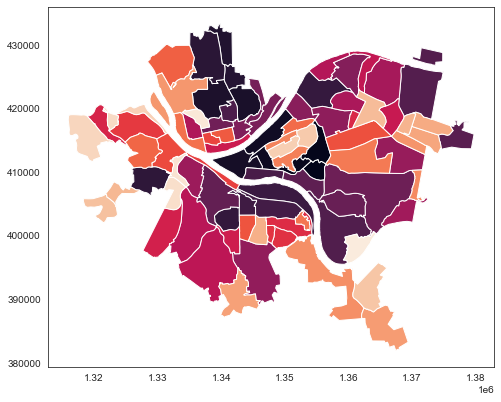

In [74]:
df_neigh = gpd.read_file("Neighborhoods/Neighborhood.shp")
df_neigh.plot(figsize=(8,8), cmap = 'rocket');

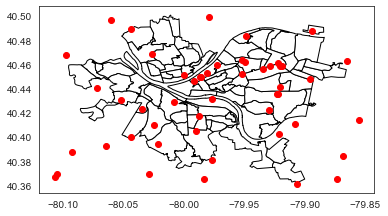

In [75]:
ax = df_neigh.to_crs("+proj=latlon").plot(color='white', edgecolor='black')
pgh_stores_gpd.plot(color='red', ax = ax)

plt.show()